<a href="https://colab.research.google.com/github/insistedMarin/imageprocessing/blob/master/DLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [13]:
%cd drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


In [11]:
!nvidia-smi

Mon Dec  5 13:27:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    32W /  70W |    570MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


In [ ]:
!git clone https://github.com/ultralytics/yolov5

从github加载yolov5模型

In [ ]:
%cd ..

/content/drive/MyDrive/deeplearning/yolov5/runs


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 41.5 MB/s 


初始化配置

In [12]:
%cd content/drive/MyDrive/deeplearning/yolov5

[Errno 2] No such file or directory: 'content/drive/MyDrive/deeplearning/yolov5'
/content


In [ ]:
# import os
# import cv2
# import numpy as np
# array_of_img = []
# def read_directory(directory_name):
#     for filename in os.listdir(r"./" + directory_name):
#         img = cv2.imread(directory_name + "/" + filename)
#         array_of_img.append(img)

#     return array_of_img

# data = read_directory("runs/detect/exp2/crops/leaves")

In [ ]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


加载pytorch

In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


加载roboflow

In [ ]:
# %cd drive/MyDrive/deeplearning

[Errno 2] No such file or directory: 'drive/MyDrive/deeplearning'
/content/drive/MyDrive/deeplearning


In [ ]:
# %cd yolov5

/content/drive/MyDrive/deeplearning/yolov5


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="RqXyEhSOFWfIwDNivY8c")
project = rf.workspace("cytech-lv8hq").project("dlproject-egkgt")
dataset = project.version(6).download("yolov7")



loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to DLProject-6 in yolov7pytorch:: 100%|██████████| 672/672 [00:05<00:00, 117.06it/s]


In [ ]:
%ls

'=1.2.0'           DLProject-1/   export.py      requirements.txt   utils/
 benchmarks.py     DLProject-2/   hubconf.py     runs/              val.py
 classify/         DLProject-3/   LICENSE        segment/           yolov5s.pt
 CONTRIBUTING.md   DLProject-4/   models/        setup.cfg
 data/             DLProject-5/   __pycache__/   train.py
 detect.py         DLProject-6/   README.md      tutorial.ipynb


引用roboflow数据集

In [ ]:
!pip install clearml>=1.2.0

In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=AFEPJA0DB83UD84PRWSJ
%env CLEARML_API_SECRET_KEY=QiJkYScyU5sjsWQryG0lZvFUtYt0Rg93J1imHBW4Hjt4dmSmAx

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=AFEPJA0DB83UD84PRWSJ
env: CLEARML_API_SECRET_KEY=QiJkYScyU5sjsWQryG0lZvFUtYt0Rg93J1imHBW4Hjt4dmSmAx


下面init时，输入的用户名和密码，host 就用https://app.clear.ml

In [ ]:
!clearml-init

ClearML SDK setup process

Please create new clearml credentials through the settings page in your `clearml-server` web app (e.g. http://localhost:8080//settings/workspace-configuration) 
Or create a free account at https://app.clear.ml/settings/workspace-configuration

In settings page, press "Create new credentials", then press "Copy to clipboard".

Paste copied configuration here:
AFEPJA0DB83UD84PRWSJ
Could not parse credentials, please try entering them manually.
Enter user access key: AFEPJA0DB83UD84PRWSJ
Enter user secret: QiJkYScyU5sjsWQryG0lZvFUtYt0Rg93J1imHBW4Hjt4dmSmAx
Detected credentials key="AFEPJA0DB83UD84PRWSJ" secret="QiJk***"

Editing configuration file: /root/clearml.conf
Enter the url of the clearml-server's Web service, for example: https://api.clear.ml

WEB Host configured to: https://app.clear.ml

ClearML Hosts configuration:
Web App: https://app.clear.ml
API: https://api.clear.ml
File Store: https://files.clear.ml

Verifying credentials ...
Credentials verified!


In [ ]:
%cd ..

/content/drive/MyDrive/deeplearning/yolov5


In [ ]:
!python train.py --img 640 --batch 64 --epochs 300 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/deeplearning/yolov5/runs/DLProject-6/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 54 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-235-g75728bb Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0

In [14]:
%cd yolov5

/content/drive/MyDrive/deeplearning/yolov5


使用初始模型训练

In [ ]:
!python detect.py --weights runs/train/exp20/weights/best.pt --img 640 --conf 0.45 --source {dataset.location}/train/images
!python detect.py --weights runs/train/exp20/weights/best.pt --img 640 --conf 0.45 --source {dataset.location}/valid/images
!python detect.py --weights runs/train/exp20/weights/best.pt --img 640 --conf 0.45 --source {dataset.location}/test/images

detect: weights=['runs/train/exp20/weights/best.pt'], source=/content/drive/MyDrive/deeplearning/yolov5/DLProject-6/train/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.45, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-235-g75728bb Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients
tensor(0.80287, device='cuda:0')
tensor(0.84681, device='cuda:0')
tensor(0.85188, device='cuda:0')
tensor(0.86075, device='cuda:0')
tensor(0.86214, device='cuda:0')
image 1/154 /content/drive/MyDrive/deeplearning/yolov5/DLProject-6/train/images/amborella082_jpg.rf.a578264a25be6bfd33ecbf768926af19.jpg: 640x64

预测数据

In [ ]:

# import glob
# from IPython.display import Image, display

# for imageName in glob.glob('/content/drive/MyDrive/deeplearning/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
#     display(Image(filename=imageName))

In [ ]:
# model = torch.hub.load('.', 'custom', path='runs/train/exp3/weights/best.pt', source='local')

In [ ]:
# from PIL import Image
# im1 = Image.open('DLProject-2/test/images/amborella082_jpg.rf.6aaa492309e4282ed42380cd7e6ed9fe.jpg')
# imgs = [im1]

In [ ]:
# results = model(imgs)

In [ ]:
# results.show()

根据叶子识别

In [6]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 6.0 MB 66.1 MB/s 
     |████████████████████████████████| 1.7 MB 52.4 MB/s 
     |████████████████████████████████| 439 kB 74.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [3]:
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

In [7]:
model2 = Sequential([
    # 核数，核尺寸，是否填充，激活函数
    layers.Conv2D(16, kernel_size=[4, 4], padding="valid", activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[4, 4], strides=1, padding='valid'),
    layers.Conv2D(16, kernel_size=[4, 4], padding="valid", activation=tf.nn.relu),
    # 池化核，填充
    layers.MaxPool2D(pool_size=[4, 4], strides=1, padding='valid'),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(16, activation=tf.nn.relu),
    layers.Dense(2)
])

In [8]:
import os

def read_directory(directory_name):
    data=[]
    for filename in os.listdir(r"./" + directory_name):
        label=filename.split('0')[0].split('1')[0]
        # img is used to store the image data
        img = cv2.imread(directory_name + "/" + filename)
        data.append((img,label))
    return data
def preprocess(data):
    result=[]
    for img in data:
      resized = cv2.resize(img[0], dim, interpolation = cv2.INTER_AREA)
      gray = cv2.cvtColor(resized,cv2.COLOR_RGB2GRAY)
      result.append(gray)
    return result

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
# %cd runs/detect

/content/drive/MyDrive/deeplearning/yolov5/runs/detect


In [15]:
import matplotlib.pyplot as plt
dim = (200, 200)
train_set=read_directory('runs/detect/exp32/crops/leaves')
valid_set=read_directory('runs/detect/exp33/crops/leaves')
test_set=read_directory('runs/detect/exp34/crops/leaves')
# resize image


In [16]:
train_x=preprocess(train_set)
x_test=preprocess(valid_set)
# for img in x_test:
#   plt.figure("Image") # 图像窗口名称
#   plt.imshow(img)
#   plt.show()

In [25]:
data_dictionary={'amborella':{'leaves':0,'Phy':0,'TF':0,'lin':0},'castarea':{'leaves':1,'Phy':0,'TF':0,'lin':1},'convolvulaceae':{'leaves':0,'Phy':0,'TF':0,'lin':1},'desmodium':{'leaves':0,'Phy':0,'TF':1,'lin':0},'eugenia':{'leaves':0,'Phy':1,'TF':0,'lin':0},'laurus':{'leaves':0,'Phy':1,'TF':0,'lin':0},'litsea':{'leaves':0,'Phy':0,'TF':0,'lin':0},'magnolia':{'leaves':0,'Phy':0,'TF':0,'lin':0},'monimiaceae':{'leaves':0,'Phy':1,'TF':0,'lin':0},'rubus':{'leaves':1,'Phy':0,'TF':1,'lin':0},'ulmus':{'leaves':1,'Phy':0,'TF':0,'lin':0}}

# **数据字典，叶子 lisse=0 dente=1 补全其它属性**

In [18]:
def check_diction(data_set,attribute):
  result=[]
  for data in data_set:
    result.append(data_dictionary[data[1]][attribute])
  return result

查字典函数，给出数据集和要查询的属性，将属性数值化

In [19]:
y_train=check_diction(train_set,'leaves')
y_test=check_diction(valid_set,'leaves')
x_train=train_x

In [20]:
x_train = tf.cast(x_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32) / 255
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32) /255
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

整理数据集

In [21]:
model2.build(input_shape=[None, 200, 200, 1])

model2.summary()

model2.compile(optimizer=optimizers.SGD(learning_rate=0.01),
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_db = train_db.shuffle(200).batch(8)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_db = train_db.batch(4)
test_db = (x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 197, 197, 16)      272       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 194, 194, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 191, 191, 16)      4112      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 188, 188, 16)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 188, 188, 16)      0         
                                                                 
 flatten_1 (Flatten)         (None, 565504)           

建立模型

Epoch 1/20
49/51 [===========================>..] - ETA: 0s - loss: 0.4150 - accuracy: 0.8393
Epoch 1: saving model to training_1/cp.ckpt
51/51 [==============================] - 1s 24ms/step - loss: 0.4155 - accuracy: 0.8391 - val_loss: 0.6477 - val_accuracy: 0.7134
Epoch 2/20
49/51 [===========================>..] - ETA: 0s - loss: 0.3533 - accuracy: 0.8520
Epoch 2: saving model to training_1/cp.ckpt
51/51 [==============================] - 1s 21ms/step - loss: 0.3549 - accuracy: 0.8515 - val_loss: 0.6270 - val_accuracy: 0.6815
Epoch 3/20
49/51 [===========================>..] - ETA: 0s - loss: 0.3707 - accuracy: 0.8597
Epoch 3: saving model to training_1/cp.ckpt
51/51 [==============================] - 1s 24ms/step - loss: 0.3707 - accuracy: 0.8614 - val_loss: 0.6630 - val_accuracy: 0.6943
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.3913 - accuracy: 0.8144
Epoch 4: saving model to training_1/cp.ckpt
51/51 [==============================] - 1s 21ms/step - lo

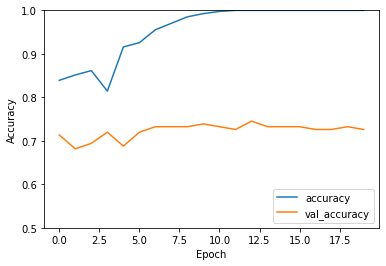

In [23]:
history = model2.fit(train_db, epochs=20,validation_data=test_db,callbacks=[cp_callback])
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

训练

In [35]:
train_set=read_directory('runs/detect/exp32/crops/phyllotaxie')
valid_set=read_directory('runs/detect/exp33/crops/phyllotaxie')
test_set=read_directory('runs/detect/exp34/crops/phyllotaxie')

In [44]:
train_x=preprocess(train_set)
x_test=preprocess(valid_set)

In [51]:
y_train=check_diction(train_set,'Phy')
y_test=check_diction(valid_set,'Phy')
x_train=train_x
x_train = tf.cast(x_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32) / 255
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32) /255
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

In [52]:
model3 = Sequential([
    # 核数，核尺寸，是否填充，激活函数
    layers.Conv2D(16, kernel_size=[4, 4], padding="valid", activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[4, 4], strides=1, padding='valid'),
    layers.Conv2D(16, kernel_size=[4, 4], padding="valid", activation=tf.nn.relu),
    # 池化核，填充
    layers.MaxPool2D(pool_size=[4, 4], strides=1, padding='valid'),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(16, activation=tf.nn.relu),
    layers.Dense(2)
])

In [53]:
checkpoint_path = "training_4/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [54]:
model3.build(input_shape=[None, 200, 200, 1])

model3.summary()

model3.compile(optimizer=optimizers.SGD(learning_rate=0.01),
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_db = train_db.shuffle(200).batch(8)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_db = train_db.batch(4)
test_db = (x_test, y_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 197, 197, 16)      272       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 194, 194, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 191, 191, 16)      4112      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 188, 188, 16)     0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 188, 188, 16)      0         
                                                                 
 flatten_6 (Flatten)         (None, 565504)           

Epoch 1/40
14/16 [=========================>....] - ETA: 0s - loss: 0.7037 - accuracy: 0.6875
Epoch 1: saving model to training_4/cp.ckpt
16/16 [==============================] - 1s 42ms/step - loss: 0.7046 - accuracy: 0.6800 - val_loss: 0.6879 - val_accuracy: 0.7333
Epoch 2/40
13/16 [=======================>......] - ETA: 0s - loss: 0.6410 - accuracy: 0.6827
Epoch 2: saving model to training_4/cp.ckpt
16/16 [==============================] - 0s 28ms/step - loss: 0.6315 - accuracy: 0.6960 - val_loss: 0.6235 - val_accuracy: 0.7333
Epoch 3/40
14/16 [=========================>....] - ETA: 0s - loss: 0.5995 - accuracy: 0.7143
Epoch 3: saving model to training_4/cp.ckpt
16/16 [==============================] - 0s 28ms/step - loss: 0.6388 - accuracy: 0.6960 - val_loss: 0.6540 - val_accuracy: 0.7333
Epoch 4/40
16/16 [==============================] - ETA: 0s - loss: 0.6171 - accuracy: 0.6960
Epoch 4: saving model to training_4/cp.ckpt
16/16 [==============================] - 0s 28ms/step - lo

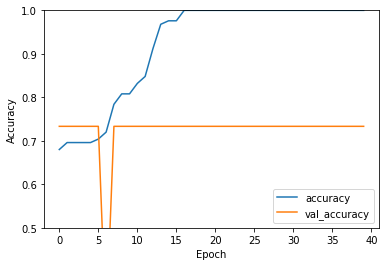

In [55]:
history = model3.fit(train_db, epochs=40,validation_data=test_db,callbacks=[cp_callback])
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()